The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


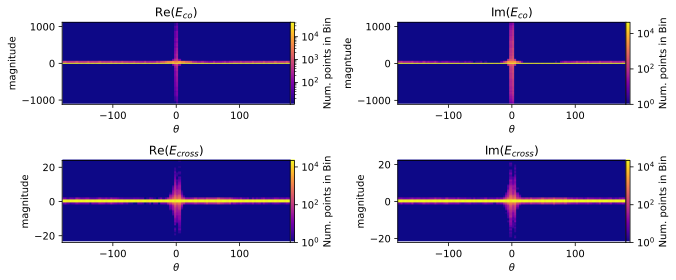

In [4]:
from copy import copy
import time

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.Utils import FigureSaver
from torch.utils.data.dataloader import DataLoader
import torch

figSaver = FigureSaver('Dataset Visualisation',default_format='png',bbox_inches='tight',dpi = 600)

#dataset = load_serialized_dataset('CircularHornDataset1')
dataset = load_serialized_dataset('PatchAntennaDataset2')

params, fields = next(iter(DataLoader(dataset,batch_size = len(dataset))))

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

def plotDatasetHistogram(dataset, magnitude_phase_plot = False):
    params, fields = next(iter(DataLoader(dataset,batch_size = len(dataset))))
    x = np.linspace(-180,180, 361)

    x = np.array([x for y in range(len(fields)*3)]).flatten()

    fig,axs = plt.subplots(ncols=2,nrows=2,figsize = (9.5,4),tight_layout = True)

    if magnitude_phase_plot:
        titles = ['$|E_{co}|$',r'$\angle E_{co}$','$|E_{cross}|$',r'$\angle E_{cross}$']
        ylabels = ['$|E|$ dB',r'$\angle E$','$|E|$ dB',r'$\angle E$']
        phase_transform = lambda a,b: np.angle(a)
        magnitude_transform = lambda a,b: 20*np.log10(np.sqrt(a**2+b**2))
        transforms = [magnitude_transform,phase_transform,magnitude_transform,phase_transform]

    else:
        titles = ['$\operatorname{Re}(E_{co})$','$\operatorname{Im}(E_{co})$','$\operatorname{Re}(E_{cross})$','$\operatorname{Im}(E_{cross})$']
        ylabels = ['magnitude','magntude','magnitude','magnitude']
        unit_transform = lambda a: a
        transforms = [unit_transform,unit_transform,unit_transform,unit_transform]



    for idx,ax in enumerate(axs.flatten()):
        
        if magnitude_phase_plot:
            if idx%2 == 0:
                Y = magnitude_transform(fields[:,idx],fields[:,idx])
            else:
                Y = phase_transform(fields[idx])

            Y = transforms[idx](fields[:,:,:,idx],fields[:,:,:,idx+1])
        else:
            Y = fields[:,:,0:3,idx]
        
        cmap = copy(plt.cm.plasma)
        cmap.set_bad(cmap(0))
        h, xedges, yedges = np.histogram2d(x, Y.numpy().flatten(),bins=[100,50])
        pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                                norm=LogNorm(), rasterized=True)
        fig.colorbar(pcm, ax=ax, label="Num. points in Bin", pad=0)
        ax.set_title(titles[idx])
        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(ylabels[idx])


def plotDatasetHistogramMagPhase(dataset):
    params, fields = next(iter(DataLoader(dataset,batch_size = len(dataset))))
    x = np.linspace(-180,180, 361)

    x = np.array([x for y in range(len(fields)*3)]).flatten()

    fig,axs = plt.subplots(ncols=2,nrows=2,figsize = (9.5,4),tight_layout = True)

    
    titles = ['$|E_{co}|$',r'$\angle E_{co}$','$|E_{cross}|$',r'$\angle E_{cross}$']
    ylabels = ['$|E|$ dB',r'$\angle E$','$|E|$ dB',r'$\angle E$']
    phase_transform = lambda a: torch.angle(a)
    magnitude_transform = lambda a,b: 20*np.log10(np.sqrt(a**2+b**2))
    transforms = [magnitude_transform,phase_transform,magnitude_transform,phase_transform]

    for idx,ax in enumerate(axs.flatten()):
        
        if idx%2 == 0:
            Y = magnitude_transform(fields[:,:,:,idx//2],fields[:,:,:,idx//2 +1])
        else:
            Y = phase_transform(fields[:,:,:,idx//2:idx//2 +1]).reshape(-1,361,3)

        print(idx//2,idx//2+2)
        print(Y.shape)
        
        cmap = copy(plt.cm.plasma)
        cmap.set_bad(cmap(0))
        h, xedges, yedges = np.histogram2d(x, Y.numpy().flatten(),bins=[100,50])
        pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                                norm=LogNorm(), rasterized=True)
        fig.colorbar(pcm, ax=ax, label="# points", pad=0)
        ax.set_title(titles[idx])
        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(ylabels[idx])




dataset = load_serialized_dataset('RFLCT')

plotDatasetHistogram(dataset)

figSaver.save('RFLCT_AllComponentPlot')



0 2
torch.Size([4000, 361, 3])
0 2
torch.Size([4000, 361, 3])
1 3
torch.Size([4000, 361, 3])
1 3
torch.Size([4000, 361, 3])


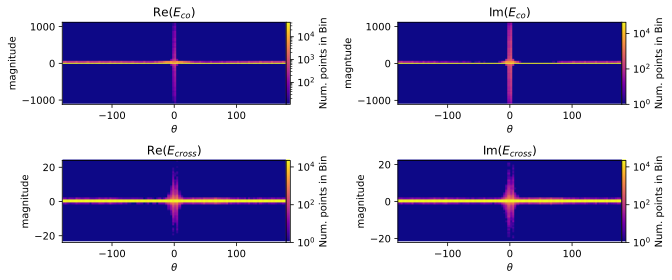

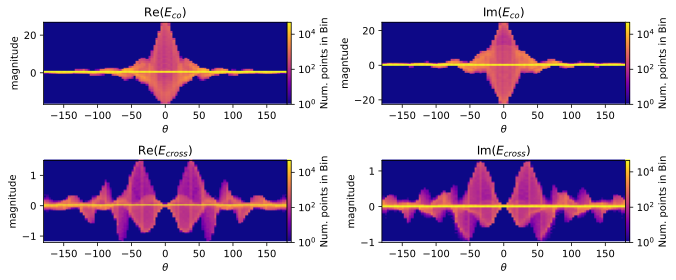

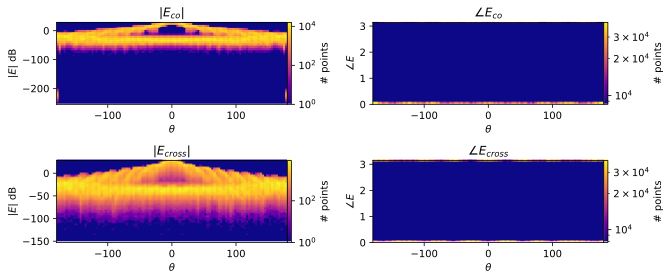

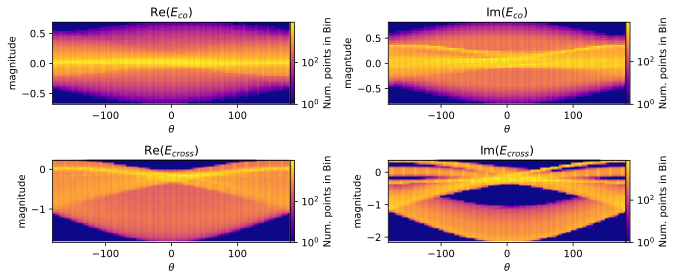

In [5]:

dataset = load_serialized_dataset('RFLCT')
plotDatasetHistogram(dataset)

dataset = load_serialized_dataset('CircularHornDataset1')
plotDatasetHistogram(dataset)

figSaver.save('CHA_AllComponentPlot')

plotDatasetHistogramMagPhase(dataset)

dataset = load_serialized_dataset('PatchAntennaDataset2')
plotDatasetHistogram(dataset)

figSaver.save('PATCH_AllComponentPlot')



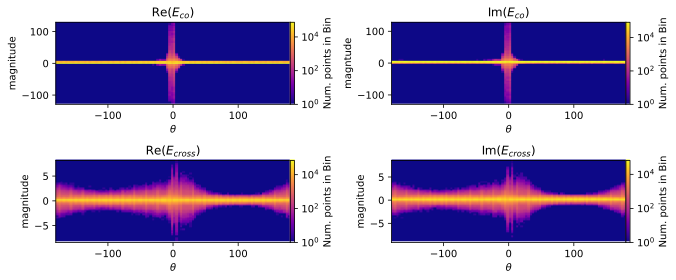

In [6]:
dataset = load_serialized_dataset('MLADataset1_Train')
plotDatasetHistogram(dataset)

figSaver.save('MLA_AllComponentPlot')
